<a href="https://colab.research.google.com/github/Muttaqin86/Data-Science/blob/main/Tugas_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2025-10-17 13:18:38--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2025-10-17 13:18:39 (4.49 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2025-10-17 13:18:39--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

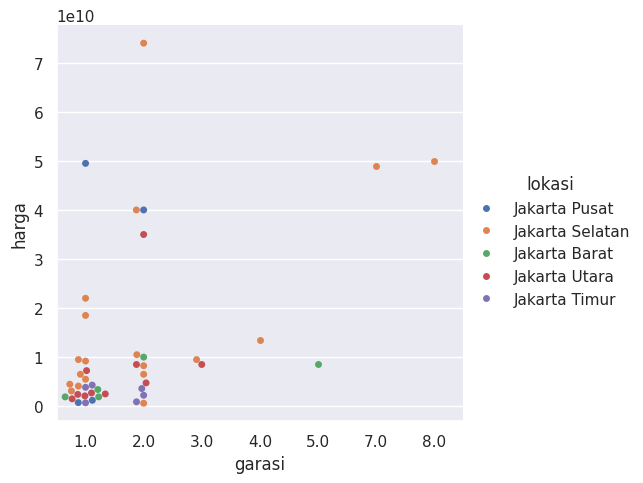

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import calendar, folium
from folium.plugins import HeatMap
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

dfJ = pd.read_csv("data/jakarta.csv")

p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfJ)

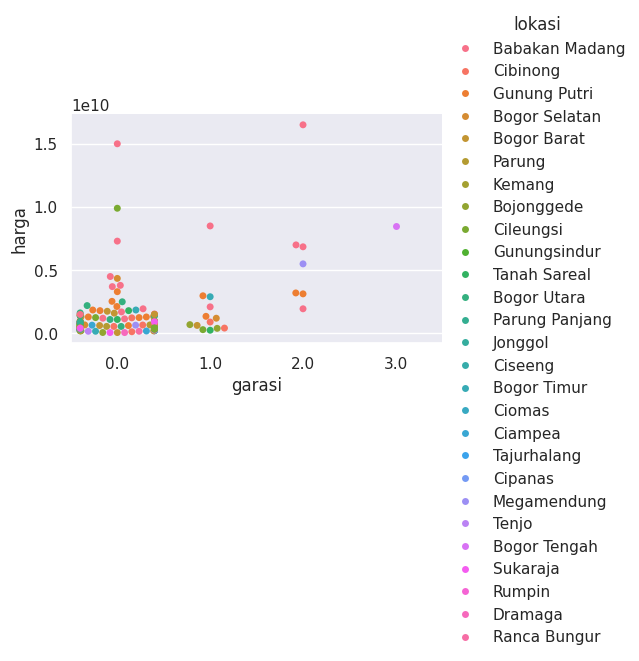

In [ ]:
dfbo = pd.read_csv("data/bogor.csv")

p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfbo)

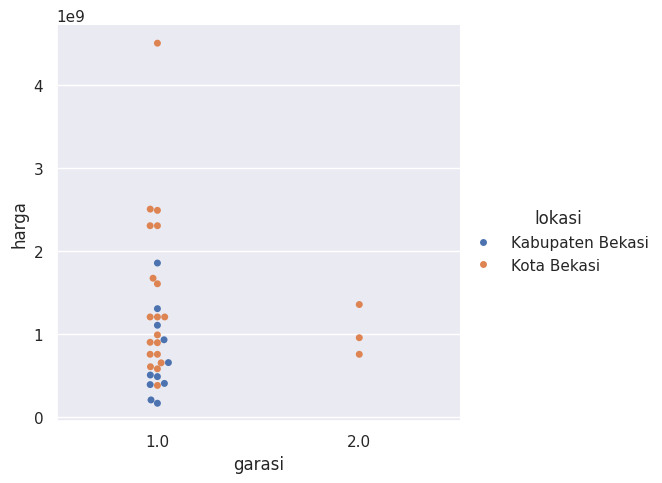

In [ ]:
dfbe = pd.read_csv("data/bekasi.csv")

p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfbe)

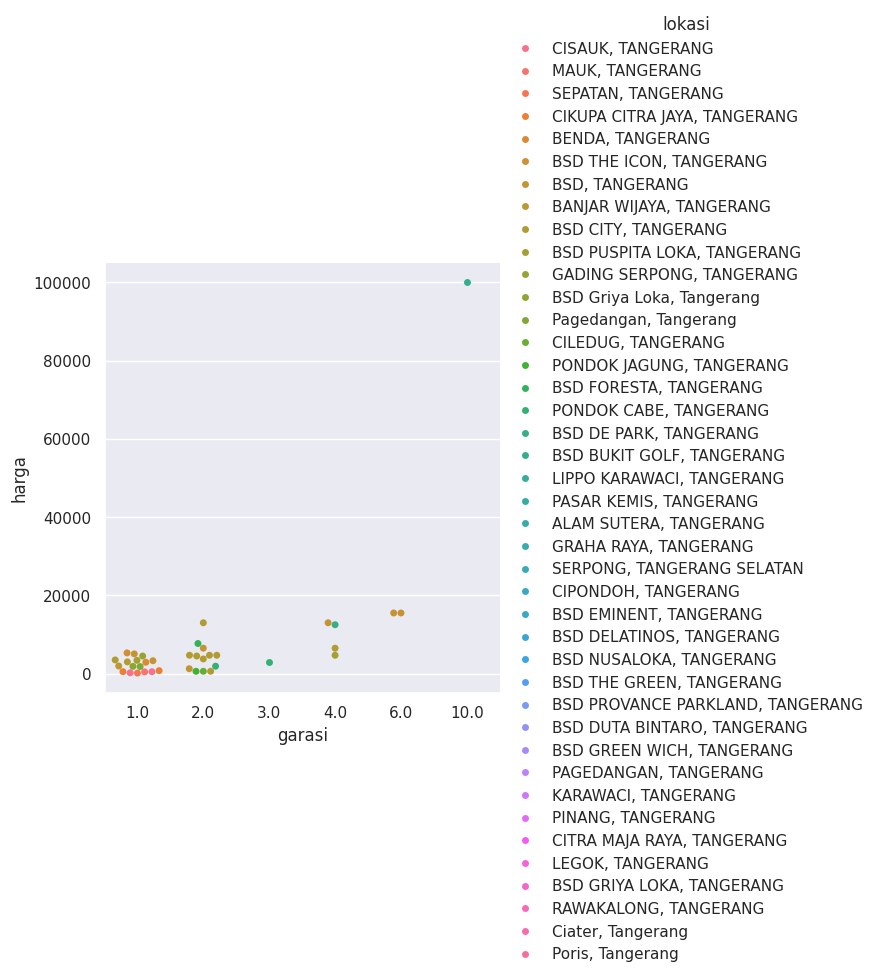

In [ ]:
dft = pd.read_csv("data/tangerang.csv")

p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dft)

In [ ]:
import csv
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import calendar, folium
from folium.plugins import HeatMap
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

def readExcel(file_path: str) -> pd.DataFrame:
    COLS = [
        'created_at','LT','LB','KT','KM','garasi','carport',
        'lokasi','sertifikat','listrik','hadap','harga','URL','deskripsi'
    ]

    rows = []
    with open(file_path, newline='', encoding='utf-8') as f:
        rdr = csv.reader(f)
        next(rdr, None)  # skip header

        for r in rdr:
            # skip baris kosong
            if not r or all(not str(c).strip() for c in r):
                continue

            # pastikan minimal 13 kolom (sampai URL)
            if len(r) < 13:
                r = r + [''] * (13 - len(r))

            # s/d URL
            fixed = r[:13]
            # gabungkan pecahan deskripsi
            tail = [t for t in r[13:] if t and t.strip() != '']
            deskripsi = ','.join(tail).strip()

            # trim spasi; kosong -> None
            fixed = [None if not str(c).strip() else str(c).strip() for c in fixed]
            deskripsi = None if deskripsi == '' else deskripsi

            rows.append(fixed + [deskripsi])

    df = pd.DataFrame(rows, columns=COLS)

    # === Casting tipe yang benar ===
    # Tanggal
    df['created_at'] = pd.to_datetime(df['created_at'], dayfirst=True, errors='coerce')

    # Jika ada pemisah ribuan seperti "1,200" -> hilangkan koma dulu (opsional)
    for c in ['LT','LB','KT','KM','garasi','carport','listrik','harga']:
        df[c] = df[c].map(lambda x: x.replace(',', '') if isinstance(x, str) else x)

    # Numerik integer-bertapak (boleh kosong)
    int_cols = ['LT','LB','KT','KM','garasi','carport','listrik']
    for c in int_cols:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')  # nullable int

    # Numerik desimal (harga bisa besar/desimal)
    df['harga'] = pd.to_numeric(df['harga'], errors='coerce').astype('Float64')

    # Teks
    for c in ['lokasi','sertifikat','hadap','URL','deskripsi']:
        df[c] = df[c].astype('string')  # dtype string (nullable)

    return df


# Kalau ingin cara lama (download kalau lokal gagal):
try:
    dfJ = readExcel("data/jakarta.csv")
    dfD = readExcel("data/depok.csv")
    dfB = readExcel("data/bogor.csv")
    dfT = readExcel("data/tangerang.csv")
    dfX = readExcel("data/bekasi.csv")
except:
    # Colab only
    !mkdir -p data
    !wget -q -O data/jakarta.csv   https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -q -O data/depok.csv     https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -q -O data/bogor.csv     https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -q -O data/tangerang.csv https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -q -O data/bekasi.csv    https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv

    dfJ = readExcel("data/jakarta.csv")
    dfD = readExcel("data/depok.csv")
    dfB = readExcel("data/bogor.csv")
    dfT = readExcel("data/tangerang.csv")
    dfX = readExcel("data/bekasi.csv")

num_cols = ['LT','LB','KT','KM','garasi','carport','listrik','harga']
for c in num_cols:
    dfJ[c] = (dfJ[c].astype(str)
                        .str.replace(r'[^\d\.-]', '', regex=True)
                        .replace('', pd.NA))
dfJ[num_cols] = dfJ[num_cols].apply(pd.to_numeric, errors='coerce')

dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,NaN,NaN,Jakarta Pusat,SHM,2200.0,<NA>,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,NaN,1.0,Jakarta Pusat,SHM,2200.0,<NA>,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,NaN,NaN,Jakarta Pusat,SHM,2200.0,<NA>,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,NaN,1.0,Jakarta Pusat,SHM,2200.0,<NA>,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,NaN,1.0,Jakarta Pusat,SHM,2200.0,<NA>,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220,239,5,4,1.0,2.0,Jakarta Timur,PPJB,3500.0,<NA>,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-12-06,70,57,3,2,NaN,2.0,Jakarta Timur,SHM,2200.0,<NA>,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access : • 2 Menit ...
118,2021-12-06,315,280,4,3,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135,190,5,5,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


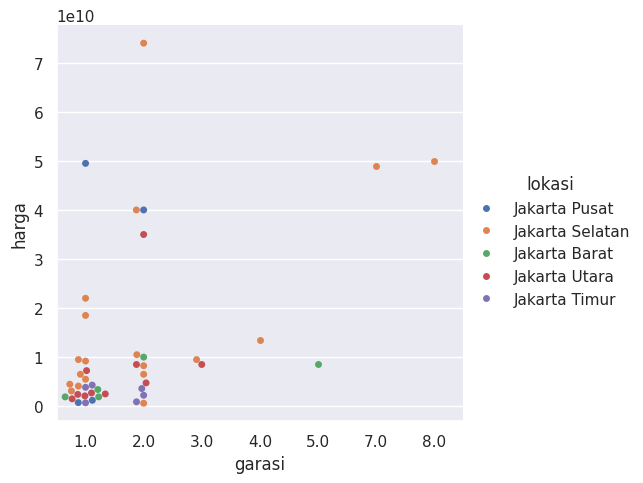

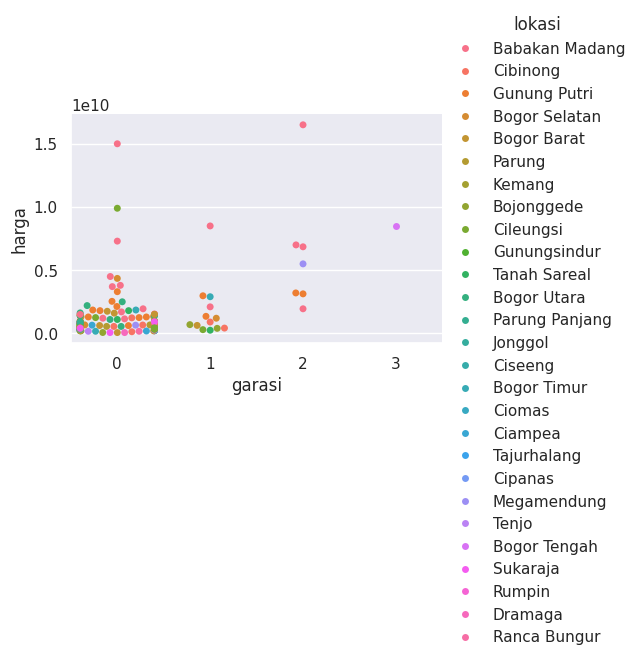

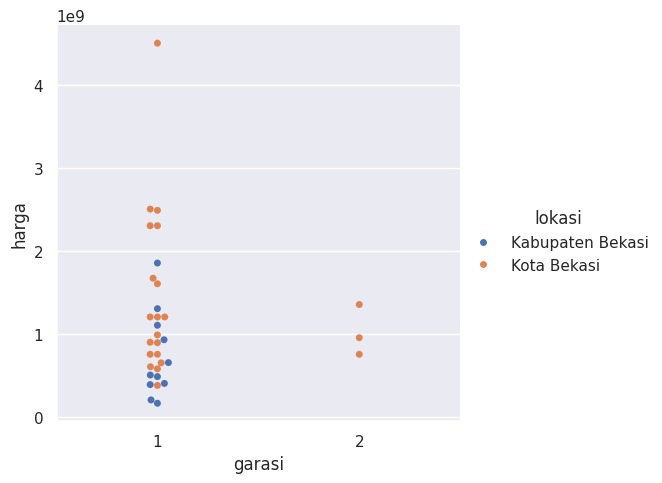

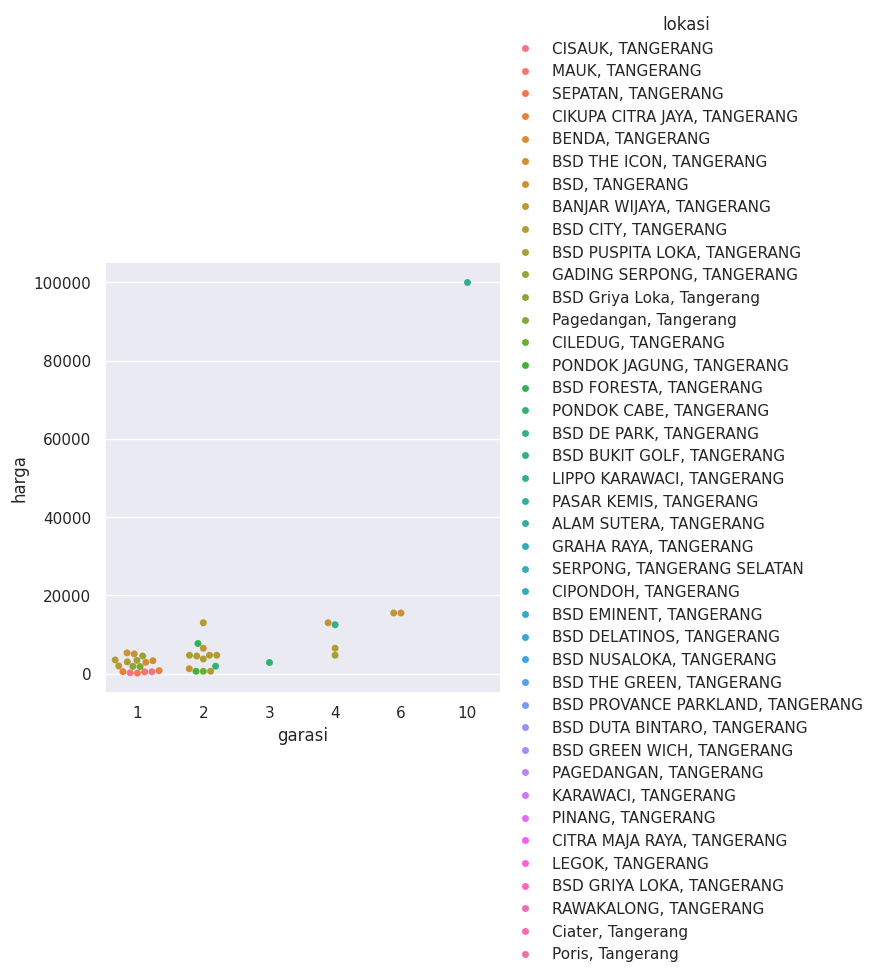

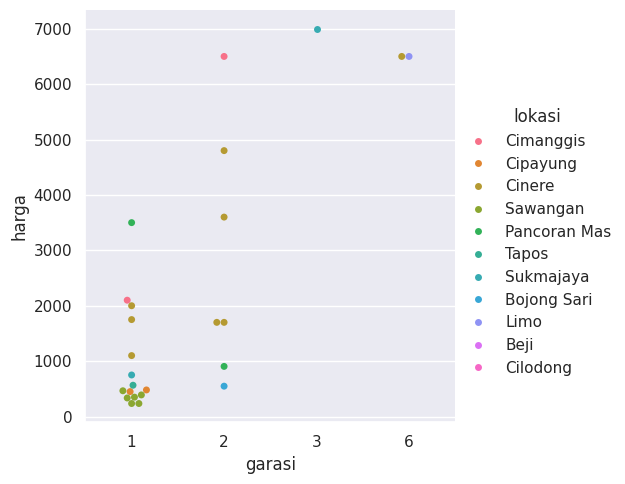

In [ ]:
p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfJ)
p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfB)
p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfX)
p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfT)
p= sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfD)